# Model 3: Model for Detecting Email Spam using Support Vector Machine(SVM)

In [1]:
# %%
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score

ImportError: cannot import name 'svm' from 'sklearn.svm' (c:\Users\Girija\Desktop\AI Msc\BLOCK 04 Research Methods and Applications\PART B\ASSESSMENT 3\SDS_ML\.venv\lib\site-packages\sklearn\svm\__init__.py)


### STEP 0: Data Preparation

In [ ]:
# Load the data
emails = pd.read_csv('test_data.csv')

# Fill missing data with empty strings
emails = emails.fillna('')

### STEP 1: Data Splitting

In [ ]:
# Convert 'spam' to 0 and 'ham' to 1 in the 'Category' column
emails['Category'] = emails['Category'].map({'spam': 0, 'ham': 1})

# Separate messages and labels
messages = emails['Message']
labels = emails['Category']

# Split the data into training and test sets
msg_train, msg_test, label_train, label_test = train_test_split(messages, labels, test_size=0.2, random_state=3)


### STEP 2: Feature Extraction

In [ ]:
# Set up the TF-IDF Vectorizer to process the text data
vectorizer = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)

# Transform the training and test data into TF-IDF features
train_features = vectorizer.fit_transform(msg_train)
test_features = vectorizer.transform(msg_test)

# Ensure labels are integers
label_train = label_train.astype('int')
label_test = label_test.astype('int')


### STEP 3: Building and Training Model

In [ ]:
# Create a Logistic Regression model
spam_model = svm.SVC()

# Train the model with the training data
spam_model.fit(train_features, label_train)

LogisticRegression()

In [ ]:
# Predict and evaluate accuracy on training data
train_predictions = spam_model.predict(train_features)
train_accuracy = accuracy_score(label_train, train_predictions)
print("Training Data Accuracy: ", train_accuracy)

# Predict and evaluate accuracy on test data
test_predictions = spam_model.predict(test_features)
test_accuracy = accuracy_score(label_test, test_predictions)
print("Test Data Accuracy: ", test_accuracy)


Training Data Accuracy:  0.9676912721561588
Test Data Accuracy:  0.9668161434977578


## Predicting a Single Message


In [ ]:
# Function to predict if a message is spam or not
def predict_spam(message):
    # Convert the message to TF-IDF features
    features = vectorizer.transform(message)
    prediction = spam_model.predict(features)
    
    # Interpret the prediction (0 for ham, 1 for spam)
    return "spam" if prediction[0] == 1 else "ham"


In [ ]:
# Example message
example_message = ["Congratulations! You've won a free trip to Hawaii. Claim your prize now!"]

# Predict if the message is spam or not
prediction = predict_spam(example_message)
print("Predicted Label:", prediction)

Predicted Label: ham


In [ ]:
# Another example message
example_message = ["This email provides relevant information about an upcoming programming workshop and encourages the recipient to RSVP if interested. It does not contain any elements typically associated with spam, such as unsolicited offers, suspicious links, or irrelevant content."]

# Predict if the message is spam or not
prediction = predict_spam(example_message)
print("Predicted Label:", prediction)

Predicted Label: spam


# Perfomance Analysis

## Model Evaluation

1. **Accuracy**: Measure the overall accuracy of the model on the test dataset.


In [ ]:

# Predict and evaluate accuracy on test data
test_predictions = spam_model.predict(test_features)
test_accuracy = accuracy_score(label_test, test_predictions)
print("Test Data Accuracy: ", test_accuracy)

Test Data Accuracy:  0.9668161434977578


2. **Precision**: Evaluate how many of the predicted positives are actual positives.


In [ ]:

# Predict probabilities
predicted_probs = spam_model.predict(test_features)

# Convert probabilities to binary class labels
binary_predictions = (predicted_probs > 0.5).astype(int)

# Calculate precision
precision = precision_score(label_test, binary_predictions)
print(f'Precision: {precision:.2f}')

Precision: 0.96


3. **Recall**: Determine how many of the actual positives are correctly identified by the model.


In [ ]:
from sklearn.metrics import recall_score

# Calculate recall
recall = recall_score(label_test, binary_predictions)
print(f'Recall: {recall:.2f}')

Recall: 1.00


4. **F1 Score**: Calculate the harmonic mean of precision and recall to get a single performance metric.


In [ ]:
from sklearn.metrics import f1_score

# Calculate F1 score
f1 = f1_score(label_test, binary_predictions)
print(f'F1 Score: {f1:.2f}')

F1 Score: 0.98


5. **Confusion Matrix**: Analyze the confusion matrix to understand the true positives, false positives, true negatives, and false negatives.


In [ ]:
from sklearn.metrics import confusion_matrix

# Confusion matrix
conf_matrix = confusion_matrix(label_test, binary_predictions)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[118  37]
 [  0 960]]


plot confusion matrix

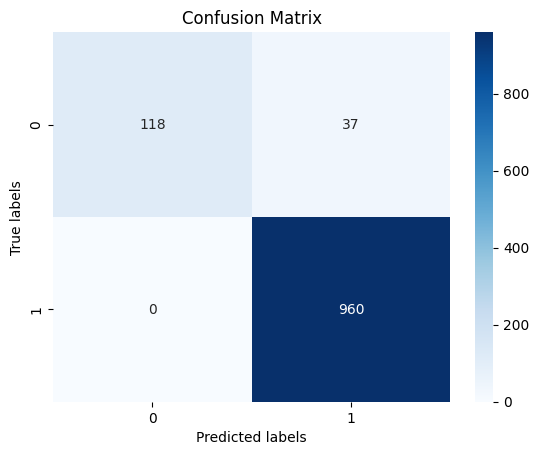

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

6. Learning Curve: Plots of training and validation/test set performance as a function of training set size. Useful for diagnosing issues such as overfitting or underfitting.

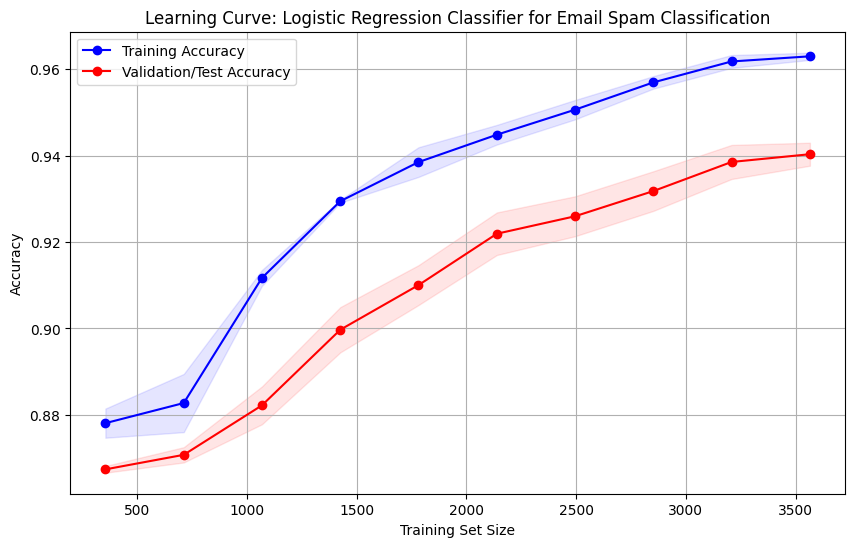

In [ ]:
from sklearn.model_selection import learning_curve

# Set up parameters for learning curve
train_sizes = np.linspace(0.1, 1.0, 10)  # Training set sizes
cv = 5  # Number of cross-validation folds

# Generate learning curves
train_sizes_abs, train_scores, test_scores = learning_curve(
    spam_model, train_features, label_train, train_sizes=train_sizes, cv=cv, scoring='accuracy', n_jobs=-1
)

# Calculate mean and standard deviation of training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.title('Learning Curve: Logistic Regression Classifier for Email Spam Classification')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.grid(True)
plt.fill_between(train_sizes_abs, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='b')
plt.fill_between(train_sizes_abs, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color='r')
plt.plot(train_sizes_abs, train_scores_mean, 'o-', color='b', label='Training Accuracy')
plt.plot(train_sizes_abs, test_scores_mean, 'o-', color='r', label='Validation/Test Accuracy')
plt.legend(loc='best')
plt.show()


## Resource Utilization


1. **Training Time**: Measure the time taken to train the model.

In [ ]:
import time

# Measure the training time
start_time = time.time()

# Train the model
spam_model.fit(train_features, label_train)

end_time = time.time()
training_time = end_time - start_time
print(f"Training Time: {training_time:.2f} seconds")

Training Time: 0.08 seconds


2. **Inference Time**: Check the time taken for the model to make predictions.


In [ ]:
# Measure inference time
start_time = time.time()
predicted_probs = spam_model.predict(test_features)
end_time = time.time()
inference_time = end_time - start_time
print(f'Inference Time: {inference_time:.4f} seconds')

Inference Time: 0.0021 seconds


Smoothing parameter (alpha)

In [ ]:

emails['Category'] = emails['Category'].map({'spam': 0, 'ham': 1})
messages = emails['Message']
labels = emails['Category']
vectorizer = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)

# Transform the training and testing data into TF-IDF features
train_features = vectorizer.fit_transform(msg_train)
test_features = vectorizer.transform(msg_test)

# Ensure labels are integers
label_train = label_train.astype('int')
label_test = label_test.astype('int')

# List of different alpha values to test
alpha_values = [0.01, 0.1, 1.0, 10.0]

# Train and evaluate the model with different alpha values
for alpha in alpha_values:
    spam_model = LogisticRegression(C=1/alpha)  # Note: C is the inverse of regularization strength
    spam_model.fit(train_features, label_train)
    test_predictions = spam_model.predict(test_features)
    test_accuracy = accuracy_score(label_test, test_predictions)
    print(f"Accuracy with alpha={alpha}: {test_accuracy:.4f}")


Accuracy with alpha=0.01: 0.9830
Accuracy with alpha=0.1: 0.9821
Accuracy with alpha=1.0: 0.9668
Accuracy with alpha=10.0: 0.8610
